In [1]:
# Pandas is used for data manipulation
import pandas as pd

In [2]:
# Read in data and display first 5 rows
features = pd.read_csv('Dataset_after_Bayesian_MXM.csv')
features.head(5)

,MH_05,MH_15A,MH_15C,MH_15D,MH_15F,LM_30,LM_40,BH_35A,BH_35B,BH_35E,BH_40A,BH_40D,BH_40F,AGEGRP,SEX,MARSTATC,PEMPSTC,PFSCDV
0,1,1,1,1,1,5,4,1,3,2,3,3,1,3,1,4,1,0
1,3,4,3,2,4,6,3,4,4,4,3,1,1,4,1,1,4,0
2,3,2,1,2,2,6,4,3,4,4,3,3,3,7,2,3,4,0
3,2,2,1,2,2,5,4,1,4,4,3,1,3,3,1,3,1,0
4,2,1,1,1,1,4,3,1,4,2,3,2,1,3,1,4,1,0


In [3]:
features = features.replace([9], 2)
features["MH_05"].replace({2: 1, 3: 2, 4: 3, 5: 4}, inplace=True)

In [4]:
features["MH_05"].value_counts().to_frame().T

,1,2,3,4
MH_05,2346,1367,714,173


In [5]:
print('The shape of our features is:', features.shape)

The shape of our features is: (4600, 18)


In [6]:
# Descriptive statistics for each column
features.describe()

,MH_05,MH_15A,MH_15C,MH_15D,MH_15F,LM_30,LM_40,BH_35A,BH_35B,BH_35E,BH_40A,BH_40D,BH_40F,AGEGRP,SEX,MARSTATC,PEMPSTC,PFSCDV
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,1.720435,1.824783,1.712826,1.753261,1.786087,4.754348,3.424130,2.030435,3.446087,3.471957,2.540217,2.212609,1.686522,4.235435,1.540000,2.093913,2.407391,0.266522
std,0.858869,0.888277,0.858003,0.884127,0.873309,1.401581,1.093132,1.113844,1.016993,0.783387,0.781188,0.904444,0.935163,1.653242,0.498452,1.240702,1.425893,0.693718
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,1.000000,3.000000,3.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,2.000000,2.000000,2.000000,2.000000,5.000000,4.000000,1.000000,4.000000,4.000000,3.000000,3.000000,1.000000,4.000000,2.000000,1.000000,2.000000,0.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,6.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,6.000000,2.000000,3.000000,4.000000,0.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,6.000000,5.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,7.000000,2.000000,4.000000,4.000000,3.000000


In [7]:
# Use numpy to convert to arrays
import numpy as np

In [8]:
# One Hot Encoding
features = pd.get_dummies(features)

<AxesSubplot:>

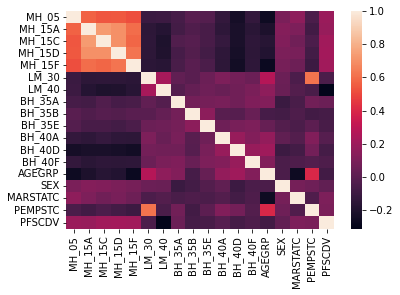

In [9]:
import seaborn as sns

# Corrleation matrix
cormat = features.corr()
round(cormat,3)
sns.heatmap(cormat)

In [10]:
# Labels are the values we want to predict
labels = features['MH_05']
# Remove the labels from the features
# axis 1 refers to the columns
features = features.drop('MH_05', axis = 1)

In [11]:
# Over-sampling the minority class

from imblearn.over_sampling import SMOTE
features, labels = SMOTE().fit_resample(features, labels)
labels.value_counts().to_frame().T

,1,2,3,4
MH_05,2346,2346,2346,2346


In [12]:
# Saving feature names for later use
feature_list = list(features.columns)

In [13]:
# Convert to numpy array
features = np.array(features)
labels = np.array(labels)

In [14]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [15]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

In [16]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (7507, 17)
Training Labels Shape: (7507,)
Testing Features Shape: (1877, 17)
Testing Labels Shape: (1877,)


In [17]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

In [18]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 2000, random_state = 100)

In [19]:
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestClassifier(n_estimators=2000, random_state=100)

In [20]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
true_values = test_labels # True values
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.26 degrees.


In [21]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 82.07 %.


In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Confusion matrix for random forest


Text(33.0, 0.5, 'True')

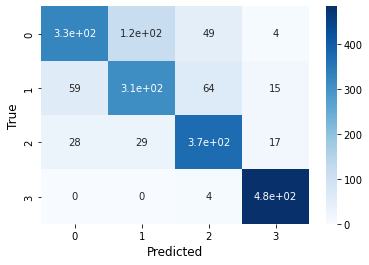

In [23]:
# To evaluate the performance of a classification model, use confusion matrix
cf_matrix = confusion_matrix(test_labels, predictions)
print("Confusion matrix for random forest")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [24]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: AGEGRP               Importance: 0.09929
Variable: MH_15A               Importance: 0.09856
Variable: MH_15C               Importance: 0.07578
Variable: MH_15D               Importance: 0.075
Variable: LM_40                Importance: 0.0729
Variable: MH_15F               Importance: 0.06609
Variable: LM_30                Importance: 0.06532
Variable: MARSTATC             Importance: 0.06414
Variable: BH_35E               Importance: 0.05349
Variable: BH_35A               Importance: 0.05218
Variable: BH_40D               Importance: 0.04971
Variable: BH_35B               Importance: 0.04729
Variable: BH_40A               Importance: 0.04289
Variable: BH_40F               Importance: 0.03717
Variable: SEX                  Importance: 0.03704
Variable: PEMPSTC              Importance: 0.03585
Variable: PFSCDV               Importance: 0.0273


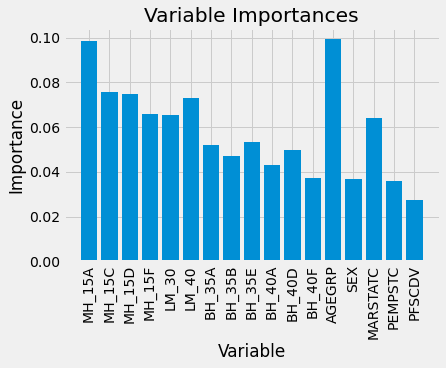

In [25]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


In [26]:
features_name = ['MH_15A', 'MH_15C', 'MH_15D', 'MH_15F', 'LM_30', 'LM_40', 'BH_35A', 'BH_35B', 'BH_35E', 'BH_40A', 'BH_40D', 'BH_40F', 'AGEGRP', 'SEX', 'MARSTATC', 'PEMPSTC', 'PFSCDV']
#Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=test_features, columns=features_name)
TestingDataResults['TargetColumn']=test_labels
TestingDataResults['Prediction']=predictions
TestingDataResults.head(20)

,MH_15A,MH_15C,MH_15D,MH_15F,LM_30,LM_40,BH_35A,BH_35B,BH_35E,BH_40A,BH_40D,BH_40F,AGEGRP,SEX,MARSTATC,PEMPSTC,PFSCDV,TargetColumn,Prediction
0,1,1,1,1,6,3,1,1,4,2,3,1,5,2,1,4,0,3,3
1,3,3,3,3,2,2,1,1,3,1,2,1,3,1,1,1,0,4,4
2,2,2,3,1,6,1,1,4,4,1,2,1,1,1,4,4,1,3,3
3,2,2,2,2,6,5,1,4,3,2,3,1,7,1,1,4,0,2,2
4,2,1,1,1,5,4,1,1,3,3,2,1,2,2,4,1,0,3,3
5,3,1,1,1,3,2,1,1,3,3,3,1,4,1,3,1,1,3,3
6,2,2,1,2,6,3,1,3,4,2,1,1,3,2,4,4,0,1,3
7,2,2,1,1,6,2,1,1,4,3,3,1,6,2,1,4,0,1,1
8,4,4,3,3,5,4,1,4,4,3,3,3,3,1,1,1,0,4,4
9,3,3,2,2,1,2,1,4,4,1,3,1,5,1,2,1,0,3,3


In [27]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [28]:
# Pull out one tree from the forest
tree = rf.estimators_[5]

In [29]:
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [30]:
# Limit depth of tree to 3 levels
rf_small = RandomForestClassifier(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');